<a href="https://colab.research.google.com/github/405620294/iShape/blob/main/nn/cnn_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [91]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

# explore data

In [92]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [93]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [94]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [95]:
transform = [
  'airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'
]

frog


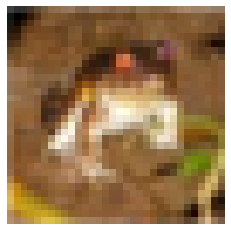

In [96]:
import matplotlib.pyplot as plt
print(transform[y_train[0][0]])
plt.axis('off')
plt.imshow(x_train[0])

# precrocessing

In [97]:
# X > 歸一化
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [98]:
# y > one hot encoding > 太占用容量 > 改用 SparseCategoricalCrossentropy

# creat a model

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten

layers = [
      # (3*3*3)*64=1728+64(bias)=1792
      Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32,32,3)),
      # no param
      MaxPooling2D(),
      # (3*3*64)*128+128=73856
      Conv2D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
      # no param
      MaxPooling2D(),
      # (3*3*128)*256+256=295128
      Conv2D(256, 3, strides=1, padding='same', activation='relu'),
      # no param 
      MaxPooling2D(),
      # no param, shape:4*4*256=4096
      Flatten(),
      # 4096*128+128=524416
      Dense(128, activation='relu'), 
      # no param
      Dropout(0.25),
      # 128*10+10=1290
      Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)             

In [100]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

# training

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, restore_best_weights=True)
model.fit(x_train_norm, y_train, batch_size=100, epochs=50, verbose=2, validation_split=0.2, callbacks=callback)

Epoch 1/100
400/400 - 4s - loss: 1.6663 - accuracy: 0.3893 - val_loss: 1.3114 - val_accuracy: 0.5242
Epoch 2/100
400/400 - 3s - loss: 1.2416 - accuracy: 0.5574 - val_loss: 1.0605 - val_accuracy: 0.6294
Epoch 3/100
400/400 - 3s - loss: 1.0331 - accuracy: 0.6363 - val_loss: 0.9675 - val_accuracy: 0.6591
Epoch 4/100
400/400 - 3s - loss: 0.9002 - accuracy: 0.6866 - val_loss: 0.8258 - val_accuracy: 0.7122
Epoch 5/100
400/400 - 3s - loss: 0.7916 - accuracy: 0.7234 - val_loss: 0.8651 - val_accuracy: 0.7004
Epoch 6/100
400/400 - 3s - loss: 0.7172 - accuracy: 0.7509 - val_loss: 0.7522 - val_accuracy: 0.7402
Epoch 7/100
400/400 - 3s - loss: 0.6368 - accuracy: 0.7754 - val_loss: 0.7379 - val_accuracy: 0.7497
Epoch 8/100
400/400 - 3s - loss: 0.5745 - accuracy: 0.7986 - val_loss: 0.7348 - val_accuracy: 0.7608
Epoch 9/100
400/400 - 3s - loss: 0.5161 - accuracy: 0.8167 - val_loss: 0.7243 - val_accuracy: 0.7597
Epoch 10/100
400/400 - 3s - loss: 0.4535 - accuracy: 0.8401 - val_loss: 0.7688 - val_accura

# evaluating

In [102]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7374 - accuracy: 0.7562


[0.73741614818573, 0.7562000155448914]

In [103]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pre = model.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre), 
             columns=[transform[i]+'(預測)' for i in range(10)], 
             index=[transform[i]+'(真實)' for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),780,14,52,23,18,6,6,6,55,40
automobile(真實),13,860,6,2,1,4,3,2,17,92
bird(真實),67,9,691,59,51,49,32,26,11,5
cat(真實),15,9,71,637,47,122,46,25,12,16
deer(真實),22,4,91,74,668,18,47,64,9,3
dog(真實),9,7,58,197,26,617,15,55,9,7
frog(真實),5,8,58,82,24,15,789,5,4,10
horse(真實),17,1,38,48,40,45,7,786,2,16
ship(真實),38,22,15,9,5,2,0,3,879,27
truck(真實),24,55,4,26,1,6,2,9,18,855


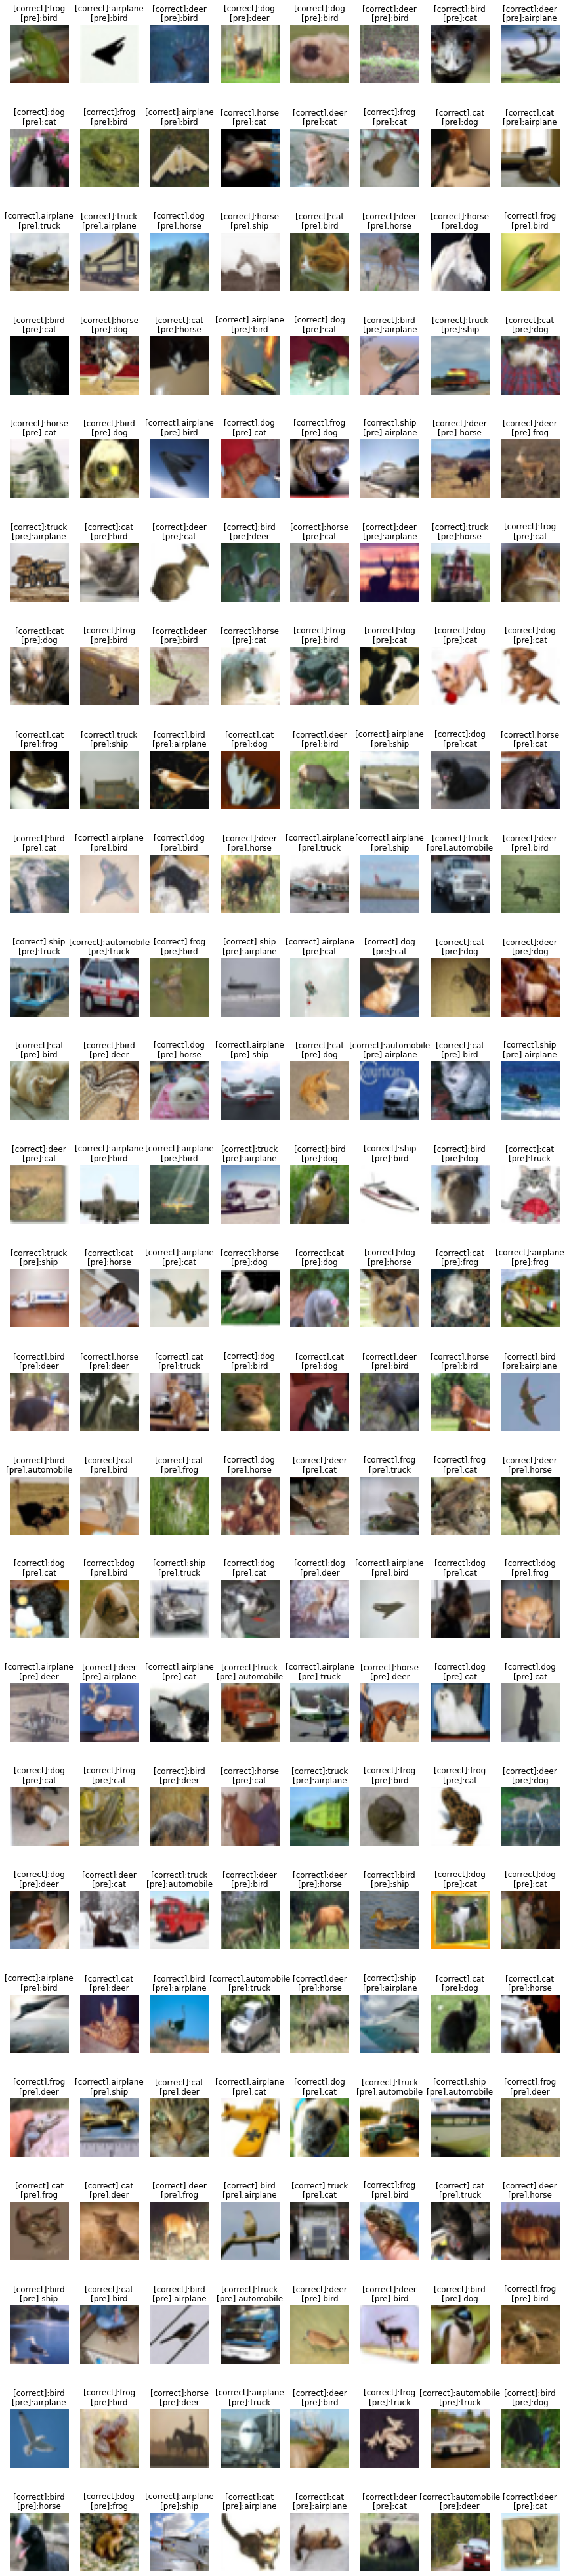

In [109]:
import numpy as np
y_test_re = y_test.reshape(-1)
idx = np.nonzero(pre != y_test_re)[0][:200]
wrong_img, wrong_pre, wrong_label = x_test[idx], pre[idx], y_test_re[idx]
plt.figure(figsize=(15,75))
w = 8
h = len(idx) / w + 1
for i in range(len(idx)):
  plt.subplot(h, w, i+1)
  plt.imshow(wrong_img[i])
  t = '[correct]:{0}\n[pre]:{1}'.format(transform[wrong_label[i]], transform[wrong_pre[i]])
  plt.title(t)
  plt.axis('off')